### 数据集分析
本数据集包含4049列数据。每一列包含5行。附上参数说明：

timestamp：浏览时间

id：用户 id

group：用户所属组别

action：用户行为，view--仅浏览；enroll--浏览并注册

duration：浏览界面时长（浏览越久，可能越感兴趣，就越有可能注册）


### 目标
此网站的客户漏斗模型：浏览主页 > 浏览课程概述页面(课程首页) > 注册课程 > 付费并完成课程。
### 通过分析ctr，分层抽样做出假设，来检验新网页的注册率是否更高。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持

# 提高输出效率库
from IPython.core.interactiveshell import InteractiveShell # 实现 notebook 的多行输出
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

## 课程首页分析
新改版的课程首页能使用户停留更久

    控制组(control)--旧页面
    实验组(experiment)--新页面
    这里假设浏览时长越长，用户对该页面就越感兴趣，注册的概率就更高

In [4]:
course = pd.read_csv('course_page_actions.csv')
course.info(); course.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4049 non-null   object 
 1   id         4049 non-null   int64  
 2   group      4049 non-null   object 
 3   action     4049 non-null   object 
 4   duration   4049 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 158.3+ KB


,timestamp,id,group,action,duration
2515,2016-12-07 01:37:11.268175,631961,experiment,view,68.934978
3374,2016-12-30 02:31:18.458697,204225,control,view,64.561215
286,2016-10-02 02:13:19.878572,576367,control,view,77.202790
3928,2017-01-15 11:33:49.935581,408319,experiment,view,58.735756
868,2016-10-18 15:23:21.778902,668031,control,view,4.035522


### 注册率分析
点击率 (CTR: click through rate)通常是点击数与浏览数的比例。因为网站页面会使用 cookies，所以我们可以确认单独用户，确保不重复统计同一个用户的点击率。为了进行该实验，我们对点击率作出如下定义：CTR: 单独用户点击数 /  单独用户浏览数


In [3]:
# 控制组注册率
control_enroll_num = course[ (course['group']=='control') & 
                         (course['action']=='enroll') ]['id'].nunique() 
control_view_num = course[ (course['group']=='control') & 
                         (course['action']=='view') ]['id'].nunique()
control_ctr = round((control_enroll_num*100 / control_view_num), 4)

print(f'控制组...')
control = {'注册数': control_enroll_num,
          '浏览数': control_view_num, 
          '注册率': str(control_ctr) + '%'}
print(control)

print('-'*45)

# 实验组注册率
exp_enroll_num = course[ (course['group']=='experiment') & 
                         (course['action']=='enroll') ]['id'].nunique() 
exp_view_num = course[ (course['group']=='experiment') & 
                         (course['action']=='view') ]['id'].nunique()
exp_ctr = round((exp_enroll_num*100 / exp_view_num), 4)

print(f'实验组...')
exp = {'注册数': exp_enroll_num,
          '浏览数': exp_view_num, 
          '注册率': str(exp_ctr) + '%'}
print(exp)

控制组...
{'注册数': 370, '浏览数': 1579, '注册率': '23.4326%'}
---------------------------------------------
实验组...
{'注册数': 439, '浏览数': 1645, '注册率': '26.6869%'}


### 浏览时长可视化

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

Text(0.5, 1.0, '实验组浏览时长分布')

Text(0.5, 1.0, '控制组浏览时长分布')

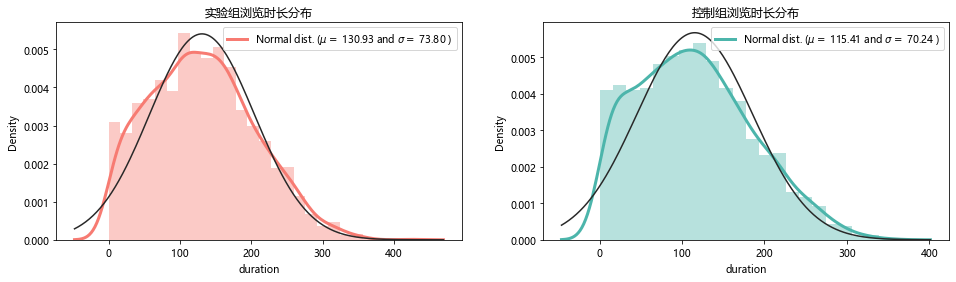

In [5]:
from scipy.stats import norm  # 用于拟合正态分布曲线

# 设置布局
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

exp_duration = course.query('group == "experiment"')['duration']
con_duration = course.query('group == "control"')['duration']

sns.distplot(exp_duration, fit=norm, color='#F77B72', 
             kde_kws={"color":'#F77B72', "lw":3 }, ax=ax1)#kdeplot(核密度估计图)
(mu, sigma) = norm.fit(exp_duration)  # 求同等条件下正态分布的 mu 和 sigma
# 添加图例：使用格式化输入，loc='best' 表示自动将图例放到最合适的位置
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. \
           format(mu, sigma)] ,loc='best')

sns.distplot(con_duration, fit=norm, color='#4CB5AB', 
             kde_kws={"color": '#4CB5AB', "lw":3 }, ax=ax2)
(mu, sigma) = norm.fit(con_duration)  # 求同等条件下正态分布的 mu 和 sigma
# 添加图例：使用格式化输入，loc='best' 表示自动将图例放到最合适的位置
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. \
           format(mu, sigma)] ,loc='best')

# 给子图添加标题
ax1.set_title('实验组浏览时长分布')
ax2.set_title('控制组浏览时长分布')

###### 结果分析
新界面的注册率有所提高，而浏览时长方面均呈现轻微的右偏，

实验组的浏览时长平均值比控制组高 15mins 左右，方差差别不大

### 可初步判断新改版的课程首页更吸引用户，后续将会进行假设检验来进一步验证我们的猜想

### 假设检验
我们将从控制组和实验组中各抽取一定数量的样本来进行假设检验

置信水平 α 的选择经验

    样本量      α-level
    ≤100        10%
    100＜n≤500   5%
    500＜n≤1000  1%
    n＞2000     千分之一

样本量过大，α-level 就没什么意义了。

使用分层抽样，Python 没有现成的库或函数，可以使用前人的轮子

In [6]:
from mysampling import get_sample

C:\Users\11974\mysampling.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sampling is "stratified":
C:\Users\11974\mysampling.py:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sampling is "simple_random":
C:\Users\11974\mysampling.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif sampling is "systematic":
C:\Users\11974\mysampling.py:63: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif sampling is "stratified":


In [9]:
# df: 输入的数据框 pandas.dataframe 对象

# sampling:抽样方法 str
 ## 可选值有 ["simple_random", "stratified", "systematic"]
 ## 按顺序分别为: 简单随机抽样、分层抽样、系统抽样

# stratified_col: 需要分层的列名的列表 list，只有在分层抽样时才生效

# k: 抽样个数或抽样比例 int or float
    ## (int, 则必须大于0; float, 则必须在区间(0,1)中)
    ## 如果 0 < k < 1 , 则 k 表示抽样对于总体的比例
    ## 如果 k >= 1 , 则 k 表示抽样的个数；当为分层抽样时，代表每层的样本量

data = get_sample(df=course, sampling='stratified', 
                  stratified_col=['group'], k=300)
data.sample(4); data.info()

,timestamp,id,group,action,duration
3677,2017-01-08 08:41:04.432002,619996,experiment,enroll,190.354290
1741,2016-11-13 22:07:36.371947,563127,control,view,76.617862
1392,2016-11-04 02:15:45.399219,330681,control,view,72.063602
1588,2016-11-10 02:21:41.580006,572647,control,view,123.104939


<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 835 to 3302
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  600 non-null    object 
 1   id         600 non-null    object 
 2   group      600 non-null    object 
 3   action     600 non-null    object 
 4   duration   600 non-null    float64
dtypes: float64(1), object(4)
memory usage: 28.1+ KB


In [10]:
# 总体未知，可采用两独立样本T检验
from scipy import stats

exp_duration = data.query('group == "experiment"')['duration']
con_duration = data.query('group == "control"')['duration']

print('两独立样本 T 检验...')
stats.ttest_ind(a=exp_duration, b=con_duration)
print('-'*45)
print('双样本 Z 检验...')
import statsmodels.  api as sm
sm.stats.ztest(x1=exp_duration, x2=con_duration)

两独立样本 T 检验...


Ttest_indResult(statistic=1.1542830452347985, pvalue=0.2488452224388853)

---------------------------------------------
双样本 Z 检验...


(1.1542830452347985, 0.24838414527694386)

### 结论综述，我们将拒绝零假设，接受 “ 新界面的浏览时长显著不同于(高于)旧界面 ” 的这个假设。
